# Proyek Analisis Sentimen terhadap Ulasan Pengguna Aplikasi BRImo
- **Nama:** Chatarina Evangelista Sitorus
- **Email:** chatarinaevas304@gmail.com
- **ID Dicoding:** dicodingchatzz

Proyek ini bertujuan untuk memahami persepsi pengguna terhadap aplikasi BRImo melalui analisis sentimen berdasarkan ulasan di Google Play Store.

## **1. Import Packages/Libraries yang Digunakan**

In [7]:
# Install sebelum import
!pip install nltk
!pip install Sastrawi
!pip install wordcloud
!pip install tensorflow

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/375.7 MB 1.5 MB/s eta 0:04:06
   ---------------------------------------- 1.0/375.7 MB 1.6 MB/s eta 0:03:59
   ---------------------------------------- 1.3/375.7 MB 1.3 MB/s eta 0:04:39
   ---------------------------------------- 1.8/375.7 MB 1.6 MB/s eta 0:03:54
   ---------------------------------------- 2.1/375.7 MB 1.6 MB/s eta 0:03:50
   ---------------------------------------- 2.6/375.7 MB 1.8 MB/s eta 0:03:26
   ---------------------------------------- 3.1/375.7 MB 1.8 MB/s eta 0:03:24
   ---------------------------------------- 3.7/375.7 MB 1.9 MB/s eta 0:03:18
   ---------------------------------------- 4.2/375.

In [2]:
# Import library umum 
import pandas as pd  
import numpy as np  
import datetime as dt  # Untuk manipulasi waktu dan tanggal
import re  # Ekspresi reguler (regex)
import string  # Operasi pada karakter, termasuk tanda baca
pd.options.mode.chained_assignment = None  # Menonaktifkan warning chained assignment
seed = 0
np.random.seed(seed)  # Set seed agar hasil reproducible

# Visualisasi 
import matplotlib.pyplot as plt  
import seaborn as sns

# Visualisasi berbasis teks 
from wordcloud import WordCloud  # Membuat word cloud dari teks

# Preprocessing teks dasar 
from nltk.stem import WordNetLemmatizer  # Lematisasi kata (khusus Bahasa Inggris)
from nltk.tokenize import word_tokenize  # Memecah kalimat menjadi kata
from nltk.corpus import stopwords  # Daftar kata umum yang sering dibuang
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing & evaluasi model ML 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

# Stemming dan stopword Bahasa Indonesia 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Untuk stemming Bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Stopword remover Indo

# Deep learning dengan TensorFlow/Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Flatten, Bidirectional, SimpleRNN, Dropout, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, SpatialDropout1D, LSTM
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


import requests
import csv
from io import StringIO


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chata\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **2. Memuat Dataset**

In [29]:
# Load dataset dari file CSV
df = pd.read_csv("Dataset/dataset_review_brimo.csv")

# Menampilkan seluruh data
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,24868505-ec59-4b9f-9814-652642d8cc5b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hasil Update hanya mengutamakan tampilan saja ...,1,7,2.1.0,2021-01-14 05:05:02,"Hai, Sobat BRI. Mohon maaf atas kendala yang d...",2025-01-12 18:10:06,2.1.0
1,31b68644-a796-47ab-87be-b245e036d6a0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi ribet, screenshot pun dibatasi beda d...",1,1,2.80.0,2025-04-07 13:06:50,"Hai Sobat BRI, mohon maaf atas kendala yang di...",2025-04-07 13:38:37,2.80.0
2,173d222b-3d3b-4a81-aec3-59c74da2023b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi sy stelah update malah crash force cl...,2,113,2.80.0,2025-03-20 04:27:49,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-03-20 19:00:04,2.80.0
3,8b622a19-4ad2-4657-bfff-b6f872d14fb8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya makin jelek aja !!! Kenapa harus m...,1,82,2.80.0,2025-03-22 06:59:32,"Hai Sobat BRI, mohon maaf atas kendala BRImo y...",2025-03-22 14:48:54,2.80.0
4,1310ede7-796f-40f8-8965-a5cfd49ab556,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setelah update terakhir selalu muncul notifika...,2,17,2.81.0,2025-04-02 08:32:21,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-04-02 09:31:59,2.81.0
...,...,...,...,...,...,...,...,...,...,...,...
32995,a2f1864d-cd91-4eee-91b4-5beb2a4b212b,yuni mahfudz,https://play-lh.googleusercontent.com/a/ACg8oc...,"Kmren baru dwonload ,langsung tak coba transak...",5,0,2.1.0,2021-02-07 11:38:58,Hi Kak. Terima kasih atas ulasannya. Semoga ap...,2021-02-07 14:02:08,2.1.0
32996,2b7d8ee8-7f0a-444b-9359-8aac13f6218f,Andisa Putra,https://play-lh.googleusercontent.com/a-/ALV-U...,"Mobile bri sering terblokir , jadi dalam satu ...",1,0,NaN,2020-11-05 17:35:18,Selamat sore Bapak Andisa Putra. Mohon maaf at...,2020-11-05 18:02:02,NaN
32997,4aef33f4-ce52-4849-adec-4d668d06178f,jefrey gunawan,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi mobile banking yg paling parah dianta...,1,0,2.3.1,2021-05-04 18:47:53,"Sobat BRI, kami sarankan untuk melakukan Updat...",2021-06-18 09:58:02,2.3.1
32998,19b74db9-13e4-4542-ab00-38e457f06aa1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Knapa ya setiap mau download gak bisa"" ..tolon...",3,0,NaN,2020-01-29 11:32:21,"Selamat siang Bapak/Ibu, mohon maaf atas ketid...",2020-01-29 12:08:05,NaN


## **3. Exploratory Data Analysis (EDA) dan Preprocessing Data**


 **- Memahami struktur data**

In [30]:
df.sample(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
1515,04944f60-4d46-45b5-8392-c523e819cbe2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"nyusahin, buka brimo bolak balik harus nonakti...",1,0,2.80.0,2025-04-03 09:58:39,"Hai Sobat BRI, mohon maaf atas kendala yang di...",2025-04-03 10:33:10,2.80.0
10568,41843367-57ae-4eb5-8964-c051690d5bd4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Maaf ini aplikasinya ngga bisa dibuka,saya ngg...",2,0,2.75.0,2024-12-21 04:59:25,"Hai, Sobat BRI. Mohon maaf atas kendala login ...",2024-12-21 09:06:43,2.75.0
28987,c152ef5a-5fb4-41d6-a6d1-8822f6b73979,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Maaf sebelumnya.. Tapi bri mobile versi lama l...,1,0,1.7.0,2020-06-19 23:51:58,"Selamat Bpk David, mohon maaf atas ketidaknyam...",2020-06-20 11:22:45,1.7.0
28531,1f56ec02-bd28-448d-acff-6f881099b992,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,BRI sungguh tidak mempermudah nasabah malah bi...,1,0,2.26.0,2022-08-27 21:52:51,"Sobat BRI, apabila mengalami kendala, dapat di...",2022-08-28 06:54:38,2.26.0
22616,2d7eb8f2-3564-4df2-b42b-b224b8f8c177,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya mau trans melalui aplikasi ini kenapa lam...,1,0,2.2.0,2021-04-13 10:35:35,"Hai Sobat BRI, mohon maaf atas kendala yang di...",2021-04-13 14:17:27,2.2.0


In [31]:
# Meninjau jumlah baris dan kolom
jumlah_data = df.shape[0]
jumlah_fitur = df.shape[1]
print(f"\nDataset terdiri dari {jumlah_data} baris dan {jumlah_fitur} kolom.")



Dataset terdiri dari 33000 baris dan 11 kolom.


In [32]:
# Meninjau tipe data dan informasi umum
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              33000 non-null  object
 1   userName              33000 non-null  object
 2   userImage             33000 non-null  object
 3   content               33000 non-null  object
 4   score                 33000 non-null  int64 
 5   thumbsUpCount         33000 non-null  int64 
 6   reviewCreatedVersion  29222 non-null  object
 7   at                    33000 non-null  object
 8   replyContent          32854 non-null  object
 9   repliedAt             32854 non-null  object
 10  appVersion            29222 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.8+ MB


In [33]:
# Menampilkan statistik deskriptif untuk semua kolom
df.describe(include='all')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
count,33000,33000,33000,33000,33000.000000,33000.000000,29222,33000,32854,32854,29222
unique,33000,1414,1414,32775,NaN,NaN,102,32982,11030,32780,102
top,03c0bde8-aa16-4e49-a966-e731b40a2076,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,NaN,NaN,2.80.0,2025-03-18 14:47:13,"Sobat BRI, mohon maaf atas kendala yang dialam...",2022-10-08 12:52:09,2.80.0
freq,1,31587,31587,18,NaN,NaN,3653,2,168,2,3653
mean,NaN,NaN,NaN,NaN,2.685697,5.937182,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.745497,51.928290,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,NaN,NaN,NaN


In [34]:
# Menampilkan jumlah nilai unik tiap kolom
df.nunique()


reviewId                33000
userName                 1414
userImage                1414
content                 32775
score                       5
thumbsUpCount             343
reviewCreatedVersion      102
at                      32982
replyContent            11030
repliedAt               32780
appVersion                102
dtype: int64

**- Menangani data duplikat**

In [35]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 0


 **- Menangani data yang hilang**

In [36]:
df.isna().sum()


reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    3778
at                         0
replyContent             146
repliedAt                146
appVersion              3778
dtype: int64

In [37]:
# Menghapus baris yang memiliki nilai NaN langsung pada df
df.dropna(inplace=True)

# Cek jumlah baris setelah penghapusan
print("Jumlah data setelah menghapus nilai NaN:", df.shape[0])

Jumlah data setelah menghapus nilai NaN: 29077


In [38]:
# Cek kembali apakah masih ada data yang hilang
print("\nCek missing value kembali:")
print(df.isna().sum())


Cek missing value kembali:
reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64


In [65]:
# Daftar kolom yang tidak relevan untuk analisis sentimen
irrelevant_columns = [
    'reviewId', 'userImage', 'thumbsUpCount',
    'reviewCreatedVersion', 'replyContent', 'repliedAt', 'appVersion'
]

# Salin DataFrame asli sebelum dilakukan penghapusan kolom
filtered_df = df.copy()

# Hapus kolom yang tidak diperlukan (hanya jika kolom tersebut ada)
filtered_df.drop(columns=[col for col in irrelevant_columns if col in filtered_df.columns], inplace=True)

# Bandingkan jumlah kolom sebelum dan sesudah penghapusan
kolom_awal = df.shape[1]
kolom_setelah = filtered_df.shape[1]
print(f"Jumlah kolom sebelum penghapusan: {kolom_awal}")
print(f"Jumlah kolom setelah penghapusan: {kolom_setelah}")

# Tampilkan nama kolom yang tersisa
print("Kolom yang tersisa:", filtered_df.columns.tolist())


Jumlah kolom sebelum penghapusan: 11
Jumlah kolom setelah penghapusan: 4
Kolom yang tersisa: ['userName', 'content', 'score', 'at']


**- Menampilkan ringkasan DataFrame setelah pembersihan kolom**

In [66]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29077 entries, 0 to 32999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  29077 non-null  object
 1   content   29077 non-null  object
 2   score     29077 non-null  int64 
 3   at        29077 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [67]:
filtered_df

,userName,content,score,at
0,Pengguna Google,Hasil Update hanya mengutamakan tampilan saja ...,1,2021-01-14 05:05:02
1,Pengguna Google,"Aplikasi ribet, screenshot pun dibatasi beda d...",1,2025-04-07 13:06:50
2,Pengguna Google,aplikasi sy stelah update malah crash force cl...,2,2025-03-20 04:27:49
3,Pengguna Google,Aplikasinya makin jelek aja !!! Kenapa harus m...,1,2025-03-22 06:59:32
4,Pengguna Google,setelah update terakhir selalu muncul notifika...,2,2025-04-02 08:32:21
...,...,...,...,...
32993,Toha Makhshun,Alhamdulillah sangat membantu saya dalam melak...,5,2021-01-10 19:01:35
32994,Ayhuu,Kenapa versi terupdate nya susah sekali pada s...,1,2023-01-10 21:17:14
32995,yuni mahfudz,"Kmren baru dwonload ,langsung tak coba transak...",5,2021-02-07 11:38:58
32997,jefrey gunawan,Aplikasi mobile banking yg paling parah dianta...,1,2021-05-04 18:47:53


- Dataset telah dibersihkan dari nilai kosong (NaN) di seluruh kolom.
- Kolom tidak relevan telah dihapus untuk menyisakan hanya userName, content, score, dan at.
- Data berjumlah 29.077 baris dan siap digunakan untuk analisis sentimen.

**- Analisis Distribusi Skor Ulasan**

score
1    12327
2     2839
3     2506
4     2122
5     9283
Name: count, dtype: int64


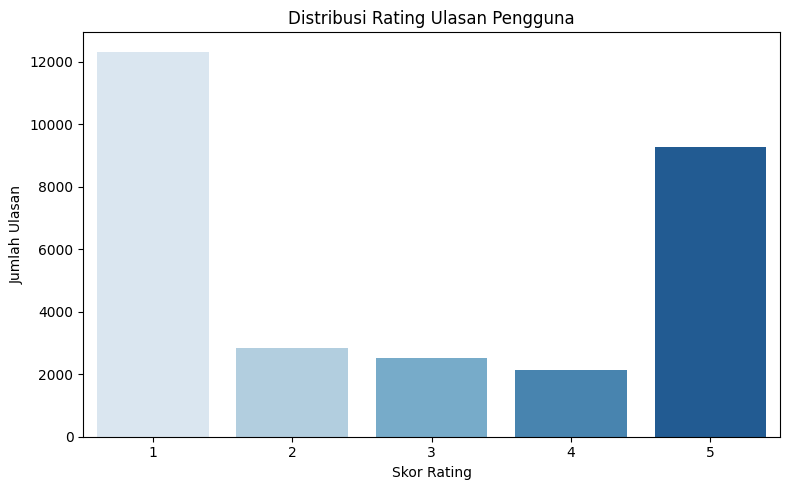

In [68]:
# Hitung jumlah ulasan untuk setiap skor (1 hingga 5)
score_distribution = filtered_df['score'].value_counts().sort_index()
print(score_distribution)

# Buat DataFrame baru untuk memudahkan penggunaan hue
score_df = score_distribution.reset_index()
score_df.columns = ['score', 'count']

# Visualisasi distribusi skor ulasan dengan palet baru dan tanpa warning
plt.figure(figsize=(8, 5))
sns.barplot(data=score_df, x='score', y='count', hue='score', palette=sns.color_palette("Blues", 5).as_hex(), legend=False)
plt.title('Distribusi Rating Ulasan Pengguna')
plt.xlabel('Skor Rating')
plt.ylabel('Jumlah Ulasan')
plt.tight_layout()
plt.show()


**- Menghapus Duplikat Ulasan Berdasarkan Isi**

In [69]:
# Hitung jumlah baris sebelum dan sesudah
sebelum = filtered_df.shape[0]
filtered_df = filtered_df.drop_duplicates(subset='content')
sesudah = filtered_df.shape[0]

print(f"Jumlah ulasan duplikat yang dihapus: {sebelum - sesudah}")
print("Setelah hapus duplikat:")
filtered_df.info()


Jumlah ulasan duplikat yang dihapus: 215
Setelah hapus duplikat:
<class 'pandas.core.frame.DataFrame'>
Index: 28862 entries, 0 to 32999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  28862 non-null  object
 1   content   28862 non-null  object
 2   score     28862 non-null  int64 
 3   at        28862 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


**Analisis kembali distribusi skor ulasan**

score
1    12325
2     2839
3     2506
4     2114
5     9078
Name: count, dtype: int64


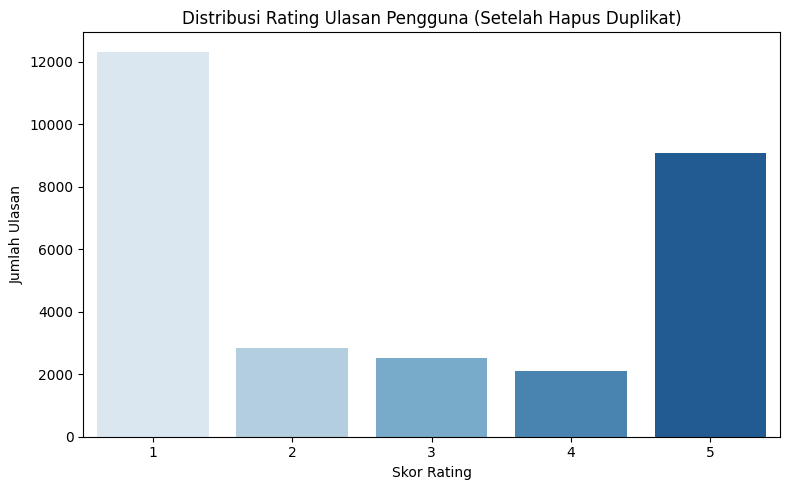

In [70]:
# Hitung ulang distribusi skor setelah penghapusan duplikat
score_distribution = filtered_df['score'].value_counts().sort_index()
print(score_distribution)

# Buat DataFrame baru untuk plotting
score_df = score_distribution.reset_index()
score_df.columns = ['score', 'count']

# Visualisasi distribusi skor ulasan
plt.figure(figsize=(8, 5))
sns.barplot(data=score_df, x='score', y='count', hue='score', palette=sns.color_palette("Blues", 5).as_hex(), legend=False)
plt.title('Distribusi Rating Ulasan Pengguna (Setelah Hapus Duplikat)')
plt.xlabel('Skor Rating')
plt.ylabel('Jumlah Ulasan')
plt.tight_layout()
plt.show()


**- Visualisasi Frekuensi Kata Sebelum Preprocessing**

In [72]:
from collections import Counter

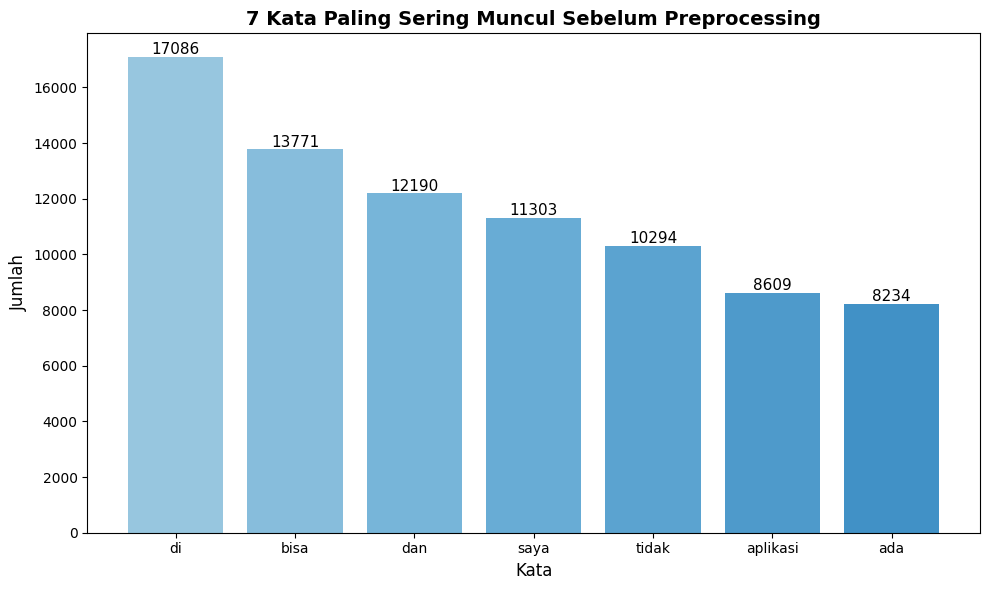

In [84]:
# Menggabungkan seluruh isi kolom 'content' jadi satu string besar
corpus_text = " ".join(filtered_df["content"].astype(str))

# Memisahkan kata berdasarkan spasi
tokens_list = corpus_text.split()

# Menghitung jumlah kemunculan tiap kata dan mengambil kata paling sering muncul
frekuensi_kata = Counter(tokens_list)
kata_teratas = frekuensi_kata.most_common(7)

# Pisahkan kata dan jumlahnya untuk visualisasi
kata, jumlah = zip(*kata_teratas)

# Visualisasi bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    kata,
    jumlah,
    color=plt.cm.Blues(range(100, 100 + 10 * len(kata), 10))
)
#bars = plt.bar(kata, jumlah, color="steelblue")
plt.title("7 Kata Paling Sering Muncul Sebelum Preprocessing", fontsize=14, fontweight='bold')
plt.xlabel("Kata", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=0)

# Menambahkan label jumlah di atas bar
for bar, jumlahnya in zip(bars, jumlah):
    plt.text(bar.get_x() + bar.get_width() / 2, jumlahnya + 100, str(jumlahnya), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


**Insight:** 
Dari visualisasi 7 kata teratas sebelum preprocessing:
- Kata seperti **"di", "bisa", "dan", "saya", "tidak"** adalah kata umum yang kurang relevan untuk analisis sentimen.
- Kata **"aplikasi"** dan **"ada"** mulai mencerminkan konteks ulasan BRImo.
  
Diperlukan *stopword removal* agar analisis fokus pada kata bermakna dan tidak bias oleh kata-kata umum.

In [87]:

frekuensi_kata = Counter(" ".join(filtered_df["content"]).split())
print(frekuensi_kata.most_common(20))


[('di', 17086), ('bisa', 13771), ('dan', 12190), ('saya', 11303), ('tidak', 10294), ('aplikasi', 8609), ('ada', 8234), ('ini', 6972), ('nya', 6389), ('sudah', 6350), ('yg', 6193), ('ke', 5962), ('mau', 5686), ('untuk', 5470), ('gak', 5339), ('yang', 5197), ('brimo', 5115), ('sangat', 4853), ('tapi', 4768), ('transaksi', 4724)]


In [85]:
from wordcloud import ImageColorGenerator, STOPWORDS

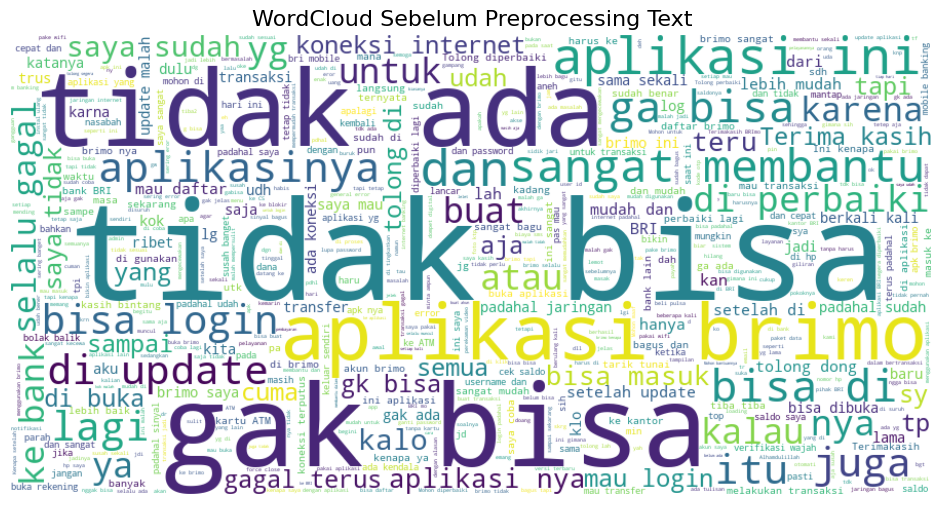

In [91]:
# Isi NaN dengan string kosong untuk hindari error
#filtered_df['content'] = filtered_df['content'].fillna('')

# Menggabungkan seluruh isi ulasan
teks_ulasan = ' '.join(filtered_df['content'].astype(str))

# Menambahkan stopwords custom
stop_kata = set(STOPWORDS)
stop_kata.update(['https', 'RT', 'co', 'amp', '...'])

# Membuat objek WordCloud
cloud = WordCloud(
    stopwords=stop_kata,
    background_color="white",
    max_words=500,
    height=450,
    width=900
).generate(teks_ulasan)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(cloud, interpolation='hamming')
plt.axis('off')
plt.title("WordCloud Sebelum Preprocessing Text", fontsize=16)
plt.show()


**Insight:**
- Kata dominan seperti “tidak”, “bisa”, “gak”, “aplikasi”, “brimo” menunjukkan banyak ulasan terkait masalah akses atau penggunaan aplikasi.
- Munculnya kata “login”, “gagal”, “update” menegaskan adanya keluhan teknis.
- Banyak kata umum/informal (“nya”, “saya”, “aja”) maka perlu dilakukan preprocessing agar analisis lebih fokus dan bermakna.

## **4. Preprocessing Text**
